# House Price Prediction 
## 1. Problem Definition:
- Predict the sale price for each house in project


In [131]:
#import libraries
import pandas as pd
import numpy as np

In [132]:
#Read csv file by pandas
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [133]:
#Set 'Id' column to Index
df = pd.read_csv('train.csv', index_col= 'Id')
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [134]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [135]:
ft = ['LotArea','YearBuilt','1stFlrSF', '2ndFlrSF','GrLivArea','FullBath','KitchenAbvGr','BedroomAbvGr','TotRmsAbvGrd']


In [136]:
x_data = df[ft]
y_data = df['SalePrice']
x_data.head()
# y_data.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenAbvGr,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,,,
1,8450,2003,856,854,1710,2,1,3,8
2,9600,1976,1262,0,1262,2,1,3,6
3,11250,2001,920,866,1786,2,1,3,6
4,9550,1915,961,756,1717,1,1,3,7
5,14260,2000,1145,1053,2198,2,1,4,9


In [137]:
from sklearn.model_selection import train_test_split
# np.random.seed(1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size= 0.8, test_size= 0.2, random_state= 0)

In [138]:
x_train

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenAbvGr,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,,,
619,11694,2007,1828,0,1828,2,1,3,9
871,6600,1962,894,0,894,1,1,2,5
93,13360,1921,964,0,964,1,1,2,5
818,13265,2002,1689,0,1689,2,1,3,7
303,13704,2001,1541,0,1541,2,1,3,6
...,...,...,...,...,...,...,...,...,...
764,9430,1999,1268,1097,2365,2,1,3,8
836,9600,1950,1067,0,1067,2,1,2,4
1217,8930,1978,1318,584,1902,2,2,4,8


In [139]:
#Using Tree Decision
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=1)


In [140]:
dt_model.fit(x_train , y_train)
y_prd = dt_model.predict(x_test)
# y_prd


In [141]:
#Compare y with y_prd
pd.DataFrame({'y': y_test.head(10), 'y_predict':y_prd[:10]})

,y,y_predict
Id,,
530,200624,180000.0
492,133000,205000.0
460,110000,119000.0
280,192000,190000.0
656,88000,89500.0
1014,85000,58500.0
1404,282922,226000.0
602,141000,107000.0
1183,745000,755000.0


In [142]:
#Using Forest Regressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
RFR = RandomForestRegressor(random_state=1)


In [143]:
RFR.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [144]:
RFR_prd = RFR.predict(x_test)

In [145]:
#Compare Y_test with RFR_prd
pd.DataFrame({"Y_Test":y_test.head(10),"RFR_prd":RFR_prd[:10]})

,Y_Test,RFR_prd
Id,,
530,200624,252829.400000
492,133000,158086.680000
460,110000,118772.760000
280,192000,194943.500000
656,88000,87647.000000
1014,85000,102512.780000
1404,282922,225461.510000
602,141000,120939.000000
1183,745000,637544.690000


In [163]:
# print('Tree DecisionTree             ')
# print(pd.DataFrame({'Y_test': y_test.head(20), }))
print('TreeDecision and RandomForest')
print(pd.DataFrame({"Y_Test":y_test.head(50),'Tree_predict':y_prd[:50] , "RandomForest_prd":RFR_prd[:50]}))


TreeDecision and RandomForest
      Y_Test  Tree_predict  RandomForest_prd
Id                                          
530   200624      180000.0     252829.400000
492   133000      205000.0     158086.680000
460   110000      119000.0     118772.760000
280   192000      190000.0     194943.500000
656    88000       89500.0      87647.000000
1014   85000       58500.0     102512.780000
1404  282922      226000.0     225461.510000
602   141000      107000.0     120939.000000
1183  745000      755000.0     637544.690000
688   148800      140000.0     145808.186667
1318  208900      196000.0     204954.760000
1004  136905      100000.0     138856.640000
1301  225000      222000.0     233540.700000
1393  123000      130000.0     125158.000000
1015  119200      147000.0     136822.000000
255   145000      121500.0     140416.000000
1323  190000      240000.0     229130.000000
90    123600      126000.0     135025.000000
32    149350      151000.0     138559.240000
483   155000      140000.

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

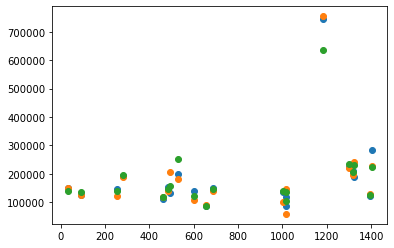

In [148]:
df_compare = pd.DataFrame({"Y_Test":y_test.head(20),'Tree_predict':y_prd[:20] , "RandomForest_prd":RFR_prd[:20]})
df_compare = df_compare.sort_values('Id')
plt.scatter(df_compare.index,df_compare['Y_Test']);
plt.scatter( df_compare.index,df_compare['Tree_predict']);
plt.scatter( df_compare.index,df_compare['RandomForest_prd']);
plt.legend
plt.show()

In [149]:
from sklearn.metrics import mean_squared_error


In [150]:
print("Mean squared error Tree Decision:",mean_squared_error(y_test, y_prd))
print("Mean squared error Random Forest Regressor:",mean_squared_error(y_test, RFR_prd))

Mean squared error Tree Decision: 1606707940.1917808
Mean squared error Random Forest Regressor: 1309255219.625449


In [151]:
print(np.corrcoef(y_test, y_prd))
print(np.corrcoef(y_test, RFR_prd))

[[1.         0.88247209]
 [0.88247209 1.        ]]
[[1.         0.90041769]
 [0.90041769 1.        ]]


We will use Random Forest Regressor 

In [152]:
house_df = pd.read_csv('test.csv', index_col= 'Id')
house_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [153]:
house_data = house_df[ft]
house_data

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenAbvGr,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,,,
1461,11622,1961,896,0,896,1,1,2,5
1462,14267,1958,1329,0,1329,1,1,3,6
1463,13830,1997,928,701,1629,2,1,3,6
1464,9978,1998,926,678,1604,2,1,3,7
1465,5005,1992,1280,0,1280,2,1,2,5
...,...,...,...,...,...,...,...,...,...
2915,1936,1970,546,546,1092,1,1,3,5
2916,1894,1970,546,546,1092,1,1,3,6
2917,20000,1960,1224,0,1224,1,1,4,7


In [154]:
House_price_predict = RFR.predict(house_data)

In [155]:
House_price_predict[:20]

array([123599.58, 150136.  , 186297.  , 177287.9 , 188934.5 , 179307.67,
       168249.64, 174101.9 , 185504.2 , 117534.64, 190659.  ,  91898.75,
        87647.  , 147195.68, 120640.8 , 380703.27, 242052.88, 268149.68,
       313260.73, 424623.06])

In [156]:
# array([124564.08      , 151801.5       , 184856.        , 178783.        ,
#        187337.8       , 179062.6       , 173619.        , 174380.42      ,
#        184490.12      , 121243.43      , 186102.4       ,  92829.08333333,
#         90349.        , 145577.68      , 124188.1       , 321591.42      ,
#        238216.86      , 282230.72      , 331039.37      , 437050.26      ])

In [159]:
House_price = pd.read_csv('sample_submission.csv', index_col= 'Id')
print(House_price.head(20))

          SalePrice
Id                 
1461  169277.052498
1462  187758.393989
1463  183583.683570
1464  179317.477511
1465  150730.079977
1466  177150.989247
1467  172070.659229
1468  175110.956520
1469  162011.698832
1470  160726.247831
1471  157933.279456
1472  145291.245020
1473  159672.017632
1474  164167.518302
1475  150891.638244
1476  179460.965187
1477  185034.628914
1478  182352.192645
1479  183053.458214
1480  187823.339254


In [162]:
House_price_compare = House_price.copy()
House_price_compare['Price predict'] = House_price_predict
House_price_compare.head(20)

,SalePrice,Price predict
Id,,
1461,169277.052498,123599.58
1462,187758.393989,150136.00
1463,183583.683570,186297.00
1464,179317.477511,177287.90
1465,150730.079977,188934.50
1466,177150.989247,179307.67
1467,172070.659229,168249.64
1468,175110.956520,174101.90
1469,162011.698832,185504.20


In [175]:
House_price_compare = House_price_compare.drop('Price predict1', axis=1 )

In [176]:
House_price_compare.head(50)

,SalePrice,Price predict
Id,,
1461,169277.052498,123599.580000
1462,187758.393989,150136.000000
1463,183583.683570,186297.000000
1464,179317.477511,177287.900000
1465,150730.079977,188934.500000
1466,177150.989247,179307.670000
1467,172070.659229,168249.640000
1468,175110.956520,174101.900000
1469,162011.698832,185504.200000
